In [1]:
%run -i 'classes/libraries.py'

In [2]:
# Import all the necessary libraries used inside the system
from classes import ethData, models 

In [3]:
m = models.models()

In [4]:
df_nasdaq = m.getNasdaqData()

In [5]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
# ---------------------------------------------------
# |_______________________________|_________|________|
#           TRAIN                    TEST      PRED
#                                         today

from_data = (datetime.now() - relativedelta(days=60) - relativedelta(years=4)).strftime('%Y-%m-%d')
to_data = (datetime.now() - relativedelta(days=60)).strftime('%Y-%m-%d')
today = (datetime.now()).strftime('%Y-%m-%d')

In [6]:
from_data

'2017-03-01'

In [7]:
to_data

'2021-03-01'

In [8]:
today

'2021-04-30'

In [9]:
# web is an imported library
df = m.getStockQuote(web, df_nasdaq['symbol'][10], 'yahoo', from_data, to_data)

In [10]:
df_nasdaq['symbol'][10]

'AAL'

In [11]:
df_filtered = df.filter(['Close'])

In [12]:
df_filtered.tail(math.ceil(df_filtered.shape[0] * 0.2)).max()

Close    21.82
dtype: float64

In [13]:
models = {}
rmse = {}
perc_train = .8
symbol = df_nasdaq['symbol'][10]
df_test = df_filtered.tail(math.ceil(df_filtered.shape[0] * 1 - perc_train))
models[symbol], rmse[symbol] = m.modelBase(df_filtered, 60, perc_train, 3, False)
print("Accuracy: {0}".format(rmse[symbol] / (df_test.max() - df_test.min())))

Epoch 1/3
746/746 [==============================] - 17s 20ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0660 - mape: 24.8331
Epoch 2/3
746/746 [==============================] - 15s 20ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0342 - mape: 13.3909
Epoch 3/3
746/746 [==============================] - 15s 20ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - mape: 8.6754
Accuracy: Close    0.015146
dtype: float64


In [ ]:
prev_data = m.getStockQuote(web, df_nasdaq['symbol'][10], 'yahoo', to_data, today).values
scaler = MinMaxScaler(feature_range=(0,1))
prev_data_scaled = scaler.fit_transform(prev_data)
X_test = []
X_test.append(prev_data_scaled)
X_test = np.array(X_test)
X_test

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = models[symbol].predict(X_test)
pred_price = scaler.invcerse_transform(pred_price)

Ticker Analyzed: A
(1049, 6)
Epoch 1/10
780/780 [==============================] - 18s 21ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0393 - mape: 17.9709
Epoch 2/10
780/780 [==============================] - 16s 21ms/step - loss: 7.7441e-04 - mse: 7.7441e-04 - mae: 0.0216 - mape: 10.2157
Epoch 3/10
780/780 [==============================] - 17s 22ms/step - loss: 5.1274e-04 - mse: 5.1274e-04 - mae: 0.0169 - mape: 8.1332
Epoch 4/10
780/780 [==============================] - 17s 22ms/step - loss: 5.0478e-04 - mse: 5.0478e-04 - mae: 0.0167 - mape: 8.0723
Epoch 5/10
780/780 [==============================] - 17s 22ms/step - loss: 4.3734e-04 - mse: 4.3734e-04 - mae: 0.0155 - mape: 7.5906
Epoch 6/10
780/780 [==============================] - 17s 22ms/step - loss: 3.7929e-04 - mse: 3.7929e-04 - mae: 0.0144 - mape: 7.0784
Epoch 7/10
780/780 [==============================] - 17s 22ms/step - loss: 3.5489e-04 - mse: 3.5489e-04 - mae: 0.0138 - mape: 6.4906
Epoch 8/10
780/780 [===================

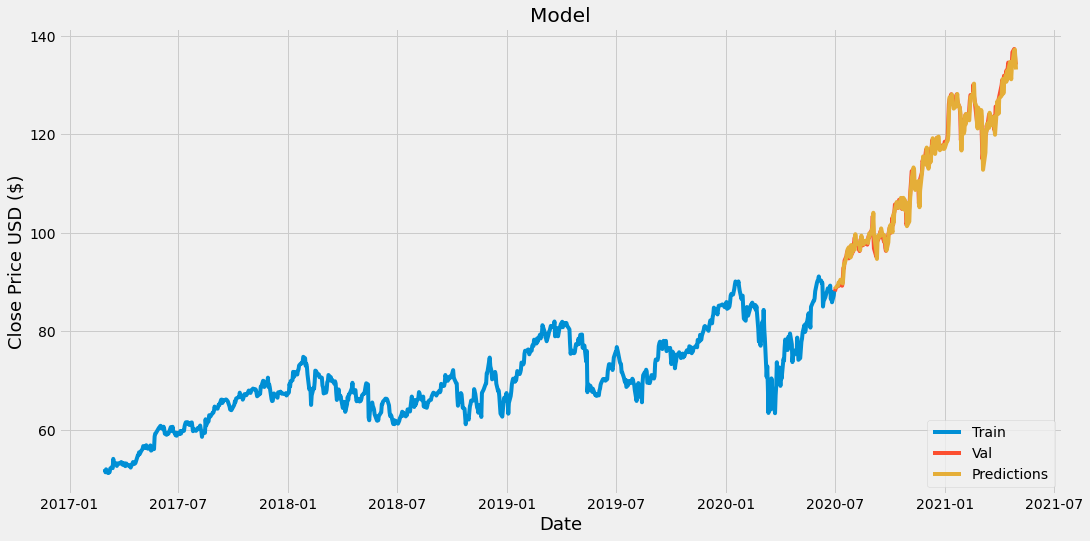

Accuracy: Close    0.001945
dtype: float64
Ticker Analyzed: AA
(1049, 6)
Epoch 1/10
780/780 [==============================] - 18s 21ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0593 - mape: 70780.8110
Epoch 2/10
780/780 [==============================] - 16s 21ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0306 - mape: 2881.6220
Epoch 3/10
780/780 [==============================] - 16s 21ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0306 - mape: 84452.7965
Epoch 4/10
780/780 [==============================] - 16s 21ms/step - loss: 9.9110e-04 - mse: 9.9110e-04 - mae: 0.0239 - mape: 149173.1320
Epoch 5/10
780/780 [==============================] - 16s 21ms/step - loss: 8.1241e-04 - mse: 8.1241e-04 - mae: 0.0209 - mape: 12749.6752
Epoch 6/10
780/780 [==============================] - 16s 21ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0247 - mape: 20816.8625
Epoch 7/10
780/780 [==============================] - 16s 21ms/step - loss: 6.4732e-04 - mse: 6.4732e-04 - mae: 0.0178 - mape: 3224

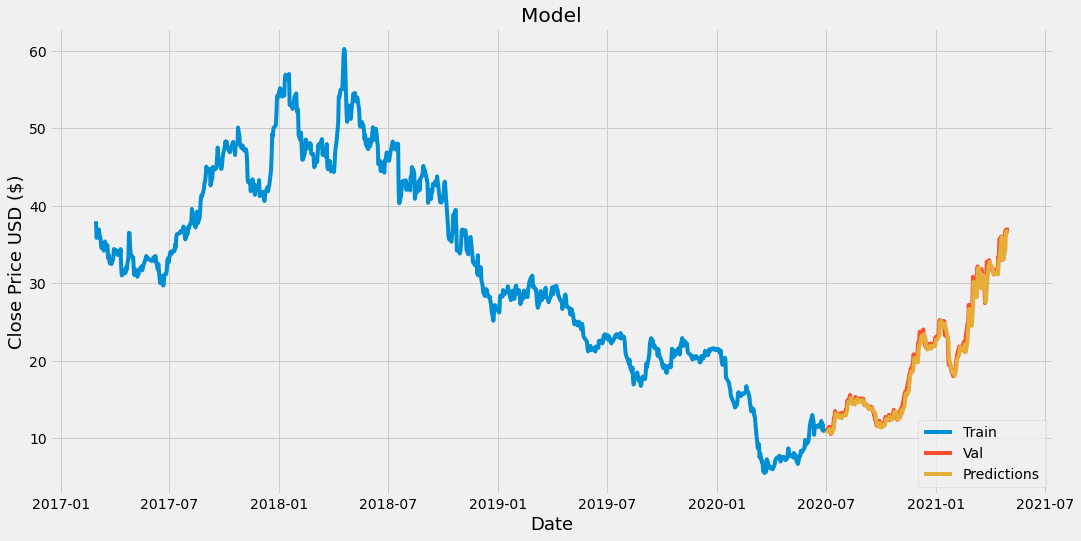

Accuracy: Close    0.005936
dtype: float64
Ticker Analyzed: AACG
(1049, 6)
Epoch 1/10
780/780 [==============================] - 18s 21ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0332 - mape: 13097.7678
Epoch 2/10
780/780 [==============================] - 16s 20ms/step - loss: 6.8440e-04 - mse: 6.8440e-04 - mae: 0.0163 - mape: 18422.1365
Epoch 3/10
780/780 [==============================] - 16s 20ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0209 - mape: 6986.0946
Epoch 4/10
780/780 [==============================] - 16s 20ms/step - loss: 7.5395e-04 - mse: 7.5395e-04 - mae: 0.0160 - mape: 25736.8952
Epoch 5/10
780/780 [==============================] - 18s 23ms/step - loss: 5.1788e-04 - mse: 5.1788e-04 - mae: 0.0123 - mape: 4747.7582
Epoch 6/10
780/780 [==============================] - 15s 19ms/step - loss: 7.4570e-04 - mse: 7.4570e-04 - mae: 0.0141 - mape: 22956.8558
Epoch 7/10
780/780 [==============================] - 19s 25ms/step - loss: 3.3070e-04 - mse: 3.3070e-04 - mae: 0.0

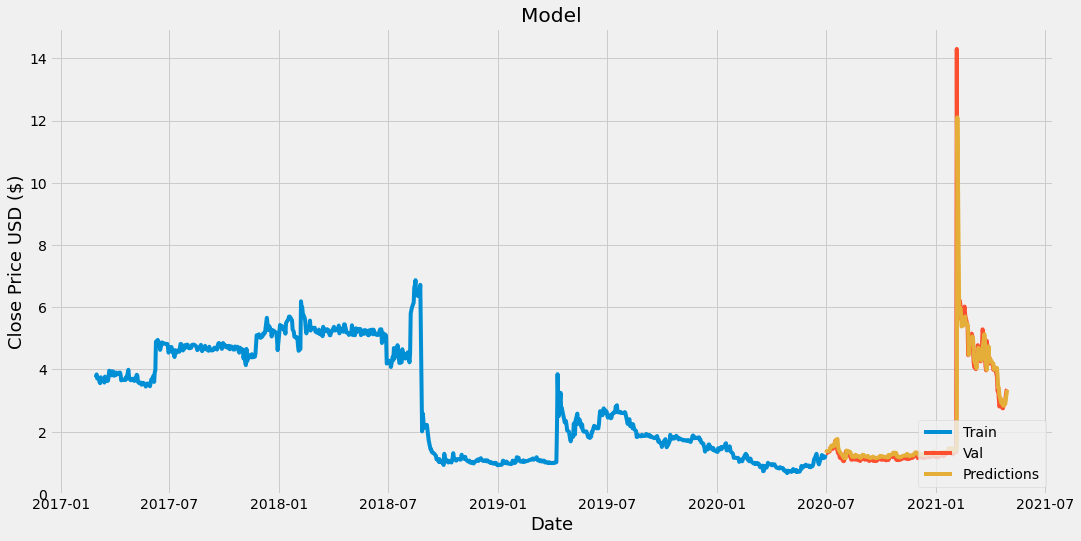

Accuracy: Close    0.001955
dtype: float64
Ticker Analyzed: AACQ
(163, 6)
Epoch 1/10
71/71 [==============================] - 3s 21ms/step - loss: 0.0818 - mse: 0.0818 - mae: 0.1873 - mape: 59.6436
Epoch 2/10
71/71 [==============================] - 1s 20ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.0931 - mape: 33.8239
Epoch 3/10
71/71 [==============================] - 2s 21ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1129 - mape: 39.5875
Epoch 4/10
71/71 [==============================] - 1s 20ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.0954 - mape: 29.7323
Epoch 5/10
71/71 [==============================] - 1s 20ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0571 - mape: 24.0920
Epoch 6/10
71/71 [==============================] - 1s 20ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0798 - mape: 29.5882
Epoch 7/10
71/71 [==============================] - 1s 20ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.0803 - mape: 28.1701
Epoch 8/10
71/71 [==============================] - 1s 20m

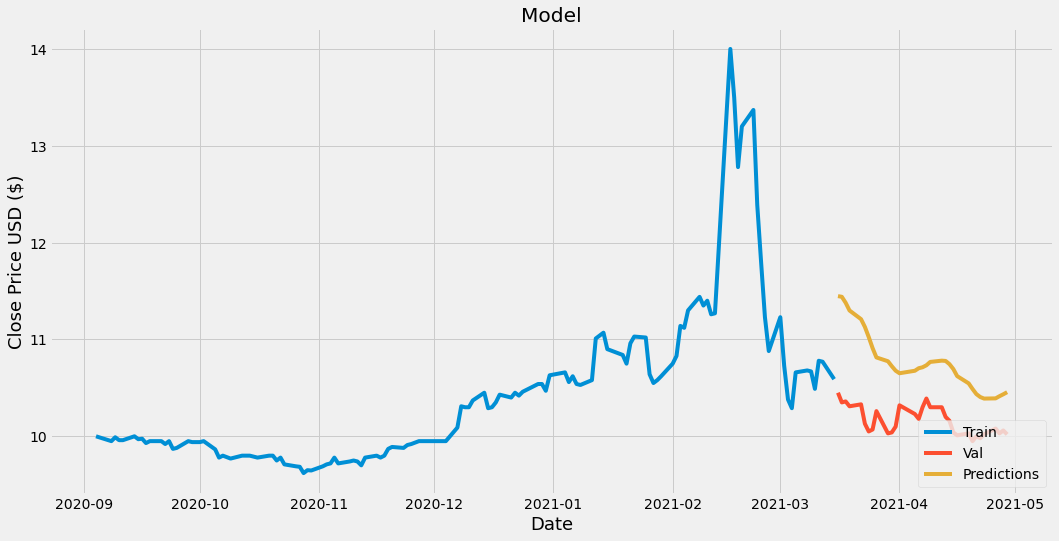

Accuracy: Close    0.139687
dtype: float64
Ticker Analyzed: AACQU
(201, 6)
Epoch 1/10
101/101 [==============================] - 5s 24ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0814 - mape: 746554.4513
Epoch 2/10
101/101 [==============================] - 2s 21ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0996 - mape: 1370361.5508
Epoch 3/10
101/101 [==============================] - 2s 21ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.0989 - mape: 726695.4251
Epoch 4/10
101/101 [==============================] - 2s 21ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0673 - mape: 694160.0187
Epoch 5/10
101/101 [==============================] - 2s 20ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0576 - mape: 1195218.4052
Epoch 6/10
101/101 [==============================] - 2s 20ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0641 - mape: 4724385.4877
Epoch 7/10
101/101 [==============================] - 2s 20ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0664 - mape: 928029.7440
Epoch 8/10
1

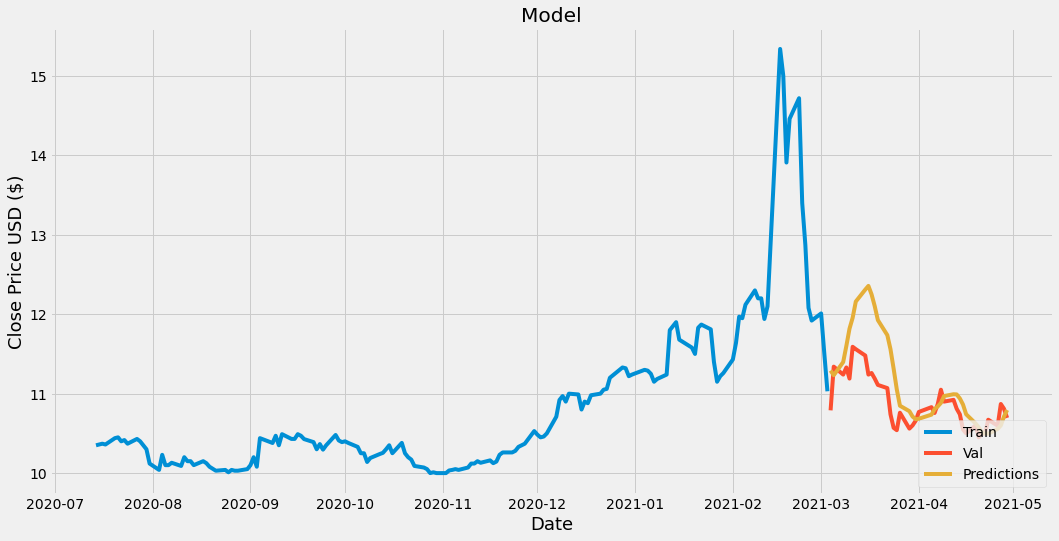

Accuracy: Close    0.050034
dtype: float64
Ticker Analyzed: AAIC
(1049, 6)
Epoch 1/10
780/780 [==============================] - 19s 22ms/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0601 - mape: 70035.8868
Epoch 2/10
780/780 [==============================] - 15s 20ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0283 - mape: 726646.3530
Epoch 3/10
780/780 [==============================] - 15s 20ms/step - loss: 9.4027e-04 - mse: 9.4027e-04 - mae: 0.0233 - mape: 191030.4530
Epoch 4/10
780/780 [==============================] - 16s 20ms/step - loss: 6.7468e-04 - mse: 6.7468e-04 - mae: 0.0196 - mape: 92151.9272
Epoch 5/10
780/780 [==============================] - 15s 20ms/step - loss: 6.5683e-04 - mse: 6.5683e-04 - mae: 0.0185 - mape: 419797.1433
Epoch 6/10
780/780 [==============================] - 15s 19ms/step - loss: 5.8230e-04 - mse: 5.8230e-04 - mae: 0.0181 - mape: 17174.9034
Epoch 7/10
780/780 [==============================] - 15s 19ms/step - loss: 7.0380e-04 - mse: 7.0380e-04 - mae

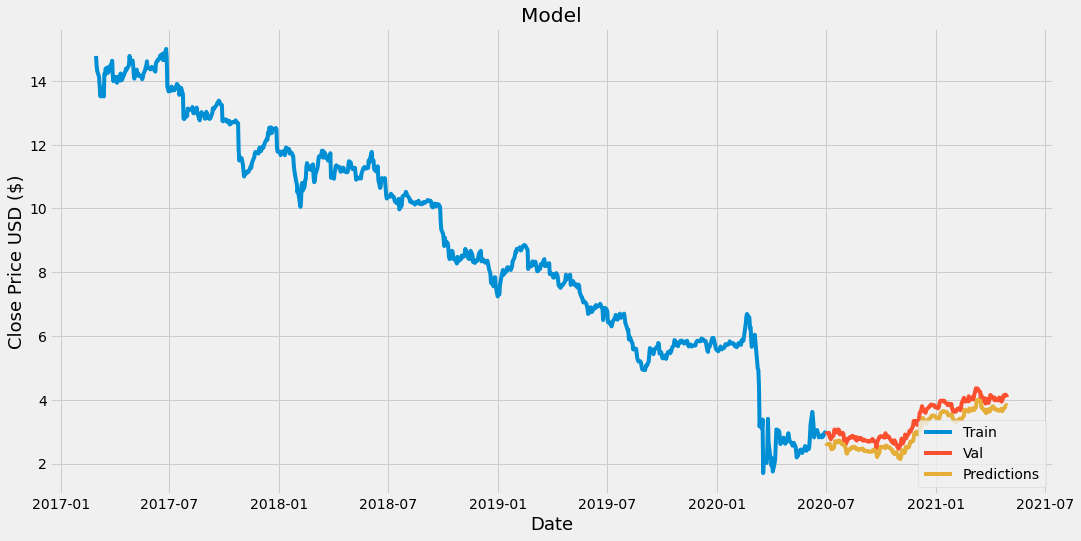

Accuracy: Close    0.0255
dtype: float64
Error on AAIC^B!
Error on AAIC^C!
Ticker Analyzed: AAL
(1049, 6)
Epoch 1/10
780/780 [==============================] - 17s 20ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0643 - mape: 8474.8417
Epoch 2/10
780/780 [==============================] - 15s 20ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0294 - mape: 12548.3629
Epoch 3/10
780/780 [==============================] - 15s 20ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0257 - mape: 7785.8520
Epoch 4/10
780/780 [==============================] - 15s 20ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0260 - mape: 1539.7853
Epoch 5/10
780/780 [==============================] - 15s 20ms/step - loss: 7.8362e-04 - mse: 7.8362e-04 - mae: 0.0222 - mape: 1965.8161
Epoch 6/10
780/780 [==============================] - 15s 19ms/step - loss: 9.6450e-04 - mse: 9.6450e-04 - mae: 0.0243 - mape: 9455.4975
Epoch 7/10
780/780 [==============================] - 15s 20ms/step - loss: 8.9081e-04 - mse: 8.9081e-0

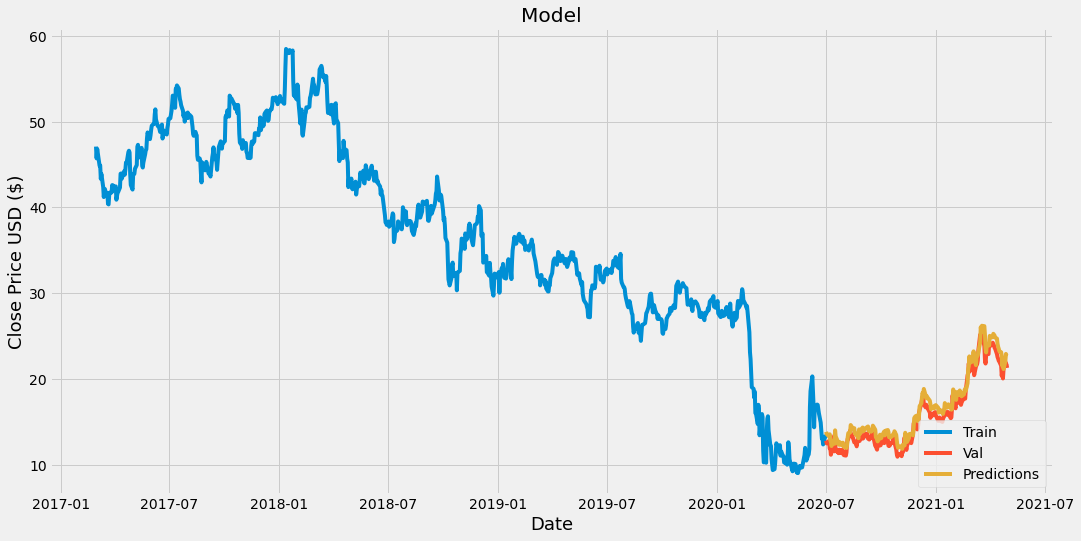

Accuracy: Close    0.017737
dtype: float64
Ticker Analyzed: AAMC
(1049, 6)
Epoch 1/10
780/780 [==============================] - 20s 23ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0615 - mape: 40002.4031
Epoch 2/10
780/780 [==============================] - 16s 20ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0307 - mape: 37144.3277
Epoch 3/10
780/780 [==============================] - 16s 21ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0254 - mape: 1488.6907
Epoch 4/10
780/780 [==============================] - 18s 23ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0318 - mape: 40019.5166
Epoch 5/10
780/780 [==============================] - 19s 25ms/step - loss: 9.9109e-04 - mse: 9.9109e-04 - mae: 0.0225 - mape: 1627.2342
Epoch 6/10
780/780 [==============================] - 15s 20ms/step - loss: 6.7832e-04 - mse: 6.7832e-04 - mae: 0.0191 - mape: 22701.9791
Epoch 7/10
780/780 [==============================] - 15s 20ms/step - loss: 7.3861e-04 - mse: 7.3861e-04 - mae: 0.0197 - mape: 1034

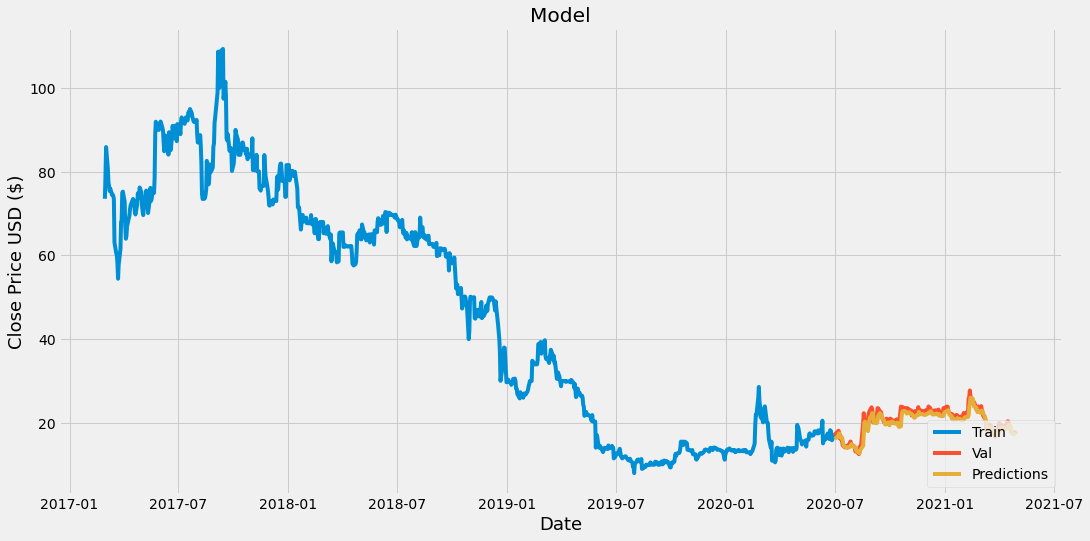

Accuracy: Close    0.006325
dtype: float64
Ticker Analyzed: AAME
(1049, 6)
Epoch 1/10
780/780 [==============================] - 18s 20ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0404 - mape: 32039.9267
Epoch 2/10
780/780 [==============================] - 17s 22ms/step - loss: 9.8470e-04 - mse: 9.8470e-04 - mae: 0.0248 - mape: 169011.9430
Epoch 3/10
780/780 [==============================] - 21s 27ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - mape: 246869.3618
Epoch 4/10
780/780 [==============================] - 19s 25ms/step - loss: 8.8417e-04 - mse: 8.8417e-04 - mae: 0.0227 - mape: 41218.0156
Epoch 5/10
780/780 [==============================] - 17s 22ms/step - loss: 9.7190e-04 - mse: 9.7190e-04 - mae: 0.0233 - mape: 282736.4791
Epoch 6/10
780/780 [==============================] - 17s 22ms/step - loss: 9.0423e-04 - mse: 9.0423e-04 - mae: 0.0231 - mape: 20348.3001
Epoch 7/10
780/780 [==============================] - 17s 21ms/step - loss: 8.0227e-04 - mse: 8.0227e-04 - mae

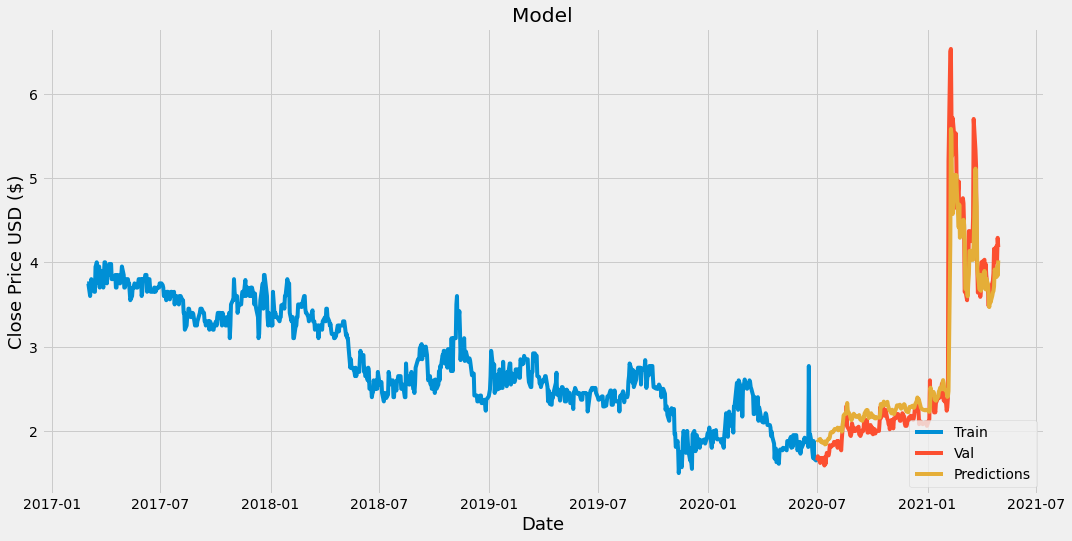

Accuracy: Close    0.004673
dtype: float64
Ticker Analyzed: AAN
(106, 6)
Epoch 1/10
25/25 [==============================] - 3s 22ms/step - loss: 0.0808 - mse: 0.0808 - mae: 0.2366 - mape: 54.0186
Epoch 2/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0799 - mape: 17.1050
Epoch 3/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0477 - mape: 10.6542
Epoch 4/10
25/25 [==============================] - 1s 23ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0525 - mape: 12.4329
Epoch 5/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0474 - mape: 9.9836
Epoch 6/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0731 - mape: 16.4668
Epoch 7/10
25/25 [==============================] - 1s 21ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0643 - mape: 13.1888
Epoch 8/10
25/25 [==============================] - 1s 20ms/

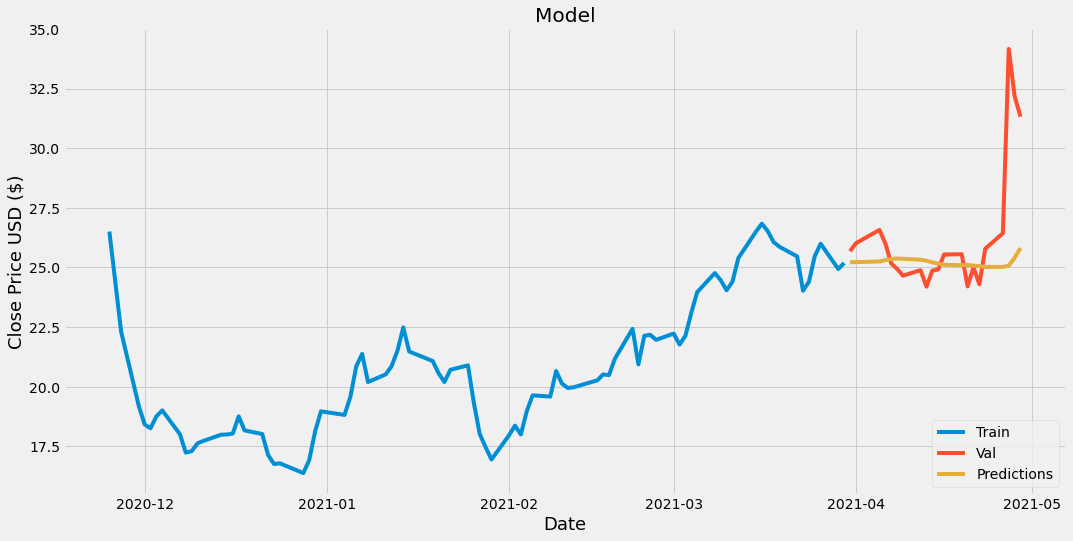

Accuracy: Close    0.060384
dtype: float64
Ticker Analyzed: AAOI
(1049, 6)
Epoch 1/10
780/780 [==============================] - 18s 21ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0533 - mape: 555062.6229
Epoch 2/10
780/780 [==============================] - 17s 21ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0256 - mape: 113246.4668
Epoch 3/10
780/780 [==============================] - 17s 21ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0223 - mape: 342.6968
Epoch 4/10
780/780 [==============================] - 17s 21ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0225 - mape: 5794.7589
Epoch 5/10
780/780 [==============================] - 17s 22ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0224 - mape: 15045.8893
Epoch 6/10
780/780 [==============================] - 19s 24ms/step - loss: 6.1421e-04 - mse: 6.1421e-04 - mae: 0.0171 - mape: 160.4088
Epoch 7/10
780/780 [==============================] - 17s 22ms/step - loss: 5.9998e-04 - mse: 5.9998e-04 - mae: 0.0153 - mape: 1626.8561
Epo

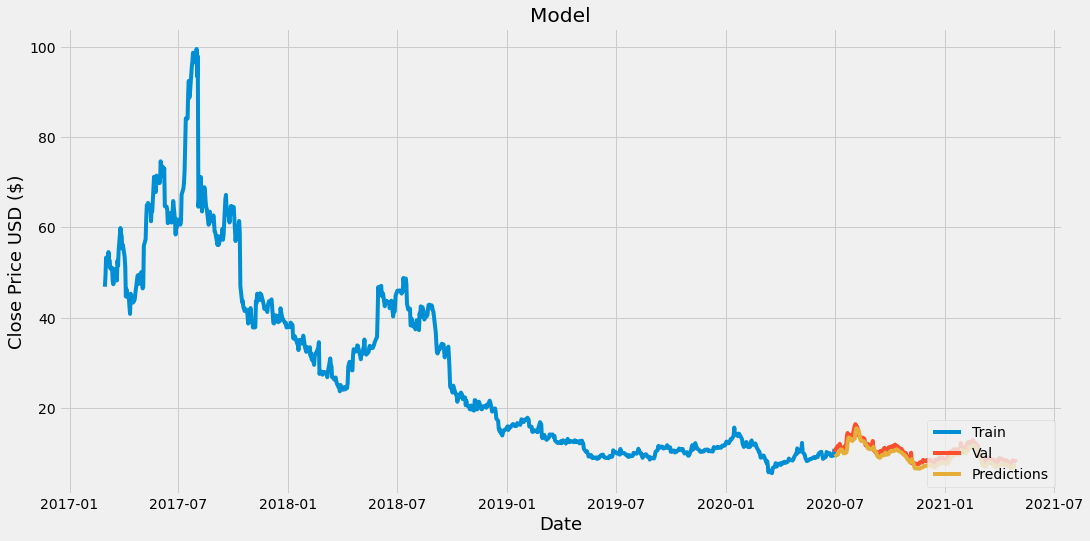

Accuracy: Close    0.009961
dtype: float64
Ticker Analyzed: AAON
(1049, 6)
Epoch 1/10
780/780 [==============================] - 19s 21ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0440 - mape: 318613.4846
Epoch 2/10
780/780 [==============================] - 17s 22ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0321 - mape: 31504.3439
Epoch 3/10
780/780 [==============================] - 16s 21ms/step - loss: 9.1677e-04 - mse: 9.1677e-04 - mae: 0.0216 - mape: 15314.7236
Epoch 4/10
780/780 [==============================] - 16s 21ms/step - loss: 7.3168e-04 - mse: 7.3168e-04 - mae: 0.0199 - mape: 93686.9977
Epoch 5/10
780/780 [==============================] - 17s 22ms/step - loss: 7.8871e-04 - mse: 7.8871e-04 - mae: 0.0205 - mape: 1948.1469
Epoch 6/10
780/780 [==============================] - 17s 22ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0218 - mape: 18444.0888
Epoch 7/10
780/780 [==============================] - 17s 22ms/step - loss: 7.5278e-04 - mse: 7.5278e-04 - mae: 0.0193 - 

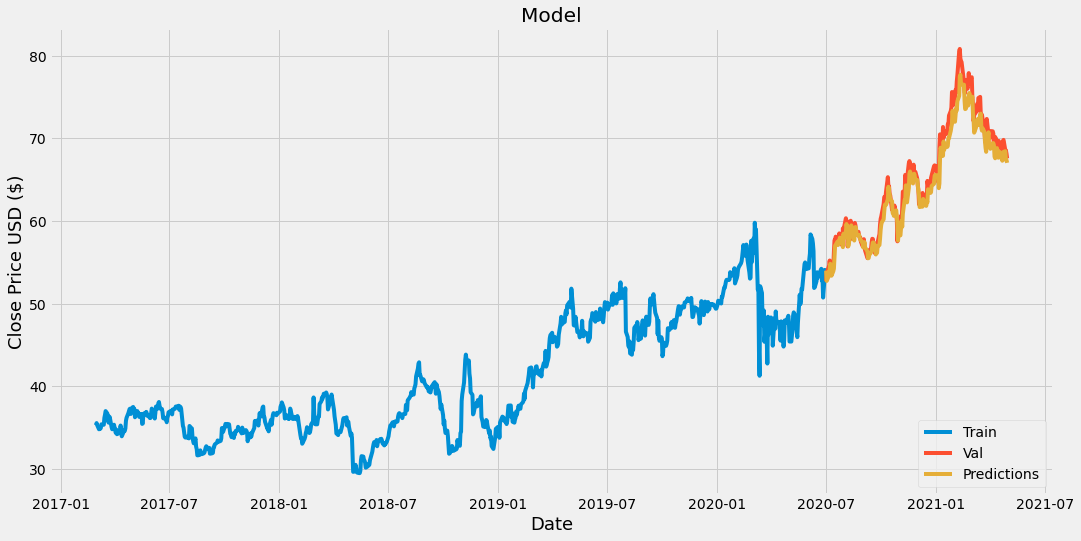

Accuracy: Close    0.020903
dtype: float64
Ticker Analyzed: AAP
(1049, 6)
Epoch 1/10
780/780 [==============================] - 19s 22ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0763 - mape: 138521.6522
Epoch 2/10
780/780 [==============================] - 17s 22ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0353 - mape: 150653.1392
Epoch 3/10
780/780 [==============================] - 18s 23ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0301 - mape: 4389.4317
Epoch 4/10
780/780 [==============================] - 17s 22ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0277 - mape: 27912.5762
Epoch 5/10
780/780 [==============================] - 18s 24ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0247 - mape: 40268.6346
Epoch 6/10
780/780 [==============================] - 21s 26ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0244 - mape: 85866.4015
Epoch 7/10
780/780 [==============================] - 18s 24ms/step - loss: 9.9481e-04 - mse: 9.9481e-04 - mae: 0.0235 - mape: 57673.5810
Epoch 8

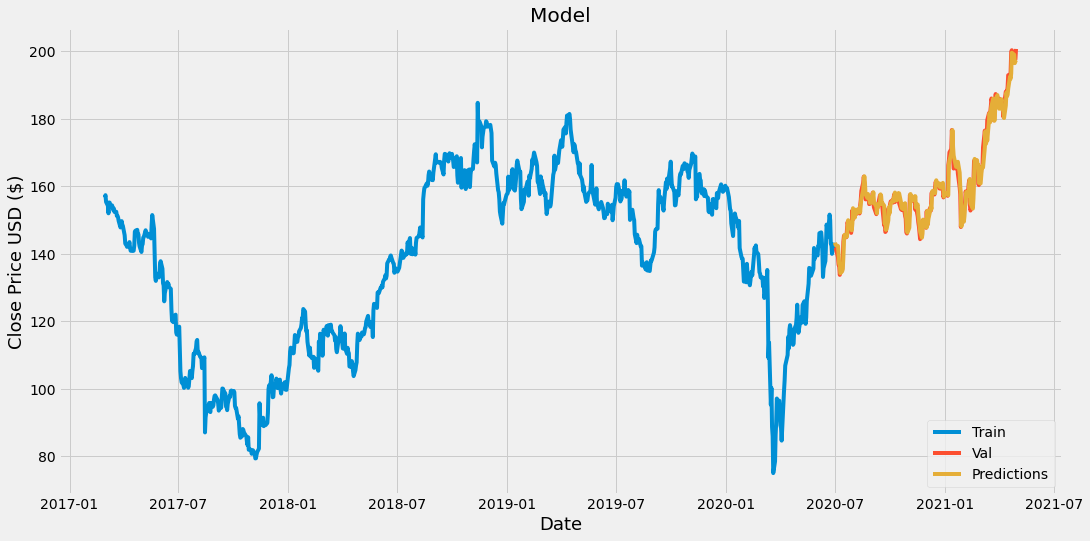

Accuracy: Close    0.000467
dtype: float64
Ticker Analyzed: AAPL
(1049, 6)
Epoch 1/10
780/780 [==============================] - 20s 22ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0271 - mape: 29.6225
Epoch 2/10
780/780 [==============================] - 16s 21ms/step - loss: 5.0470e-04 - mse: 5.0470e-04 - mae: 0.0165 - mape: 16.4605
Epoch 3/10
780/780 [==============================] - 17s 21ms/step - loss: 4.6589e-04 - mse: 4.6589e-04 - mae: 0.0158 - mape: 15.9026
Epoch 4/10
780/780 [==============================] - 17s 21ms/step - loss: 2.2856e-04 - mse: 2.2856e-04 - mae: 0.0110 - mape: 11.0449
Epoch 5/10
780/780 [==============================] - 17s 21ms/step - loss: 2.8375e-04 - mse: 2.8375e-04 - mae: 0.0123 - mape: 13.2564
Epoch 6/10
780/780 [==============================] - 16s 21ms/step - loss: 2.8116e-04 - mse: 2.8116e-04 - mae: 0.0123 - mape: 14.7604
Epoch 7/10
780/780 [==============================] - 16s 21ms/step - loss: 2.0266e-04 - mse: 2.0266e-04 - mae: 0.0109 - ma

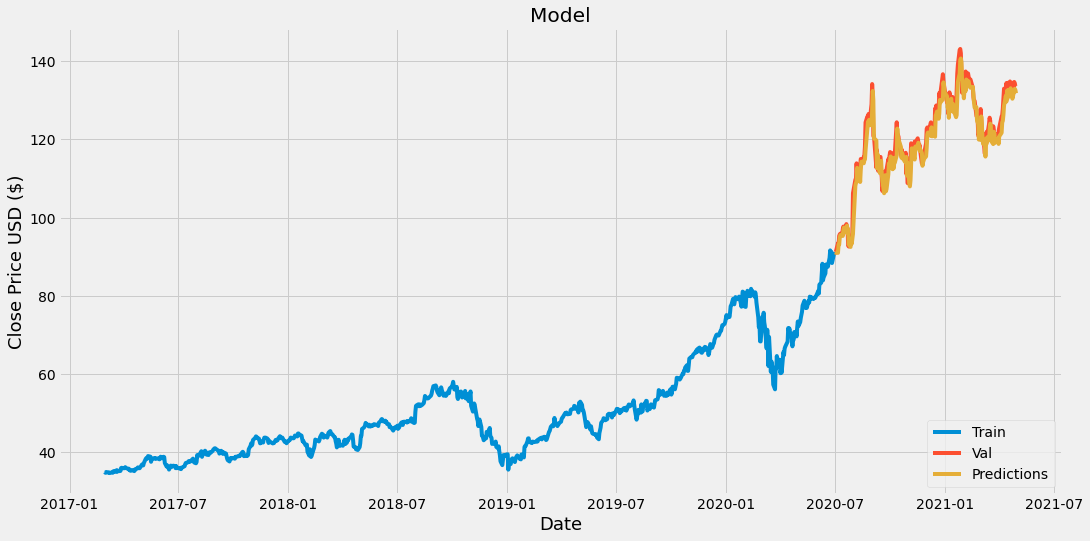

Accuracy: Close    0.012504
dtype: float64
Ticker Analyzed: AAT
(1049, 6)
Epoch 1/10
780/780 [==============================] - 21s 24ms/step - loss: 0.0188 - mse: 0.0188 - mae: 0.0728 - mape: 14.3443
Epoch 2/10
780/780 [==============================] - 21s 26ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0342 - mape: 8.2244
Epoch 3/10
780/780 [==============================] - 20s 26ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0342 - mape: 10.0074
Epoch 4/10
780/780 [==============================] - 19s 24ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0313 - mape: 9.0329
Epoch 5/10
780/780 [==============================] - 16s 21ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0259 - mape: 5.7708
Epoch 6/10
780/780 [==============================] - 16s 20ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0268 - mape: 6.0375
Epoch 7/10
780/780 [==============================] - 16s 20ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0272 - mape: 6.4520
Epoch 8/10
780/780 [======================

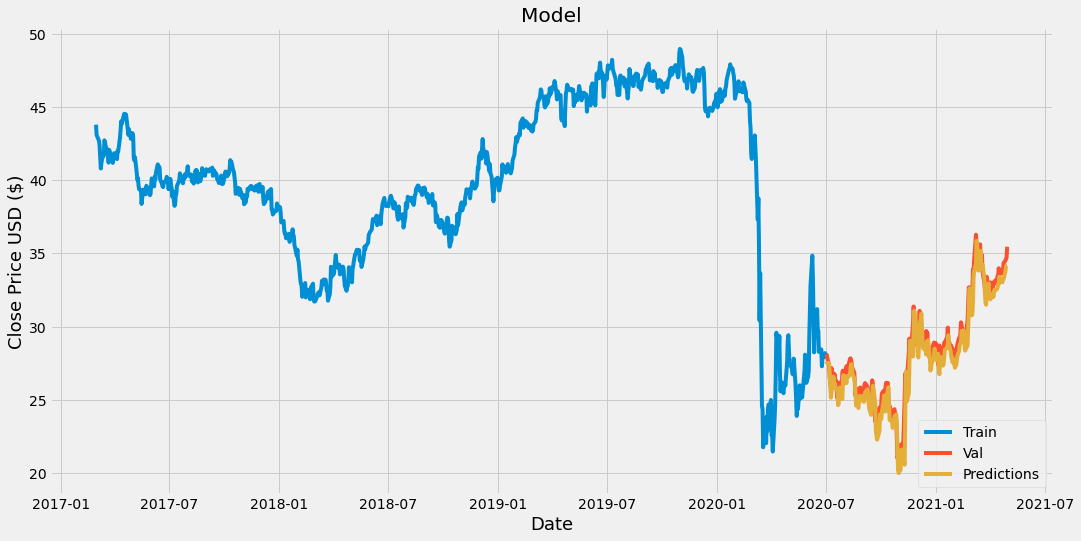

Accuracy: Close    0.020572
dtype: float64
Ticker Analyzed: AAU
(1049, 6)
Epoch 1/10
780/780 [==============================] - 19s 21ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0431 - mape: 354837.2010
Epoch 2/10
780/780 [==============================] - 16s 21ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - mape: 43560.7466
Epoch 3/10
780/780 [==============================] - 16s 20ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - mape: 145685.8509
Epoch 4/10
780/780 [==============================] - 16s 21ms/step - loss: 8.3902e-04 - mse: 8.3902e-04 - mae: 0.0226 - mape: 65620.9579
Epoch 5/10
780/780 [==============================] - 16s 20ms/step - loss: 6.2422e-04 - mse: 6.2422e-04 - mae: 0.0188 - mape: 7442.2539
Epoch 6/10
780/780 [==============================] - 16s 21ms/step - loss: 6.0186e-04 - mse: 6.0186e-04 - mae: 0.0186 - mape: 352408.8678
Epoch 7/10
780/780 [==============================] - 16s 20ms/step - loss: 6.2680e-04 - mse: 6.2680e-04 - mae: 0.0186 -

In [ ]:
models = {}
rmse = {}
for symbol in df_nasdaq['symbol']:
    try:
        df = m.getStockQuote(web, symbol, 'yahoo', from_data, today)
        if(df.notnull and df.shape[0] >= 60):
            print("Ticker Analyzed: {0}".format(symbol))
            print(df.shape)
            df_filtered = df.filter(['Close'])
            perc_train = .8
            models[symbol], rmse[symbol] = m.modelBase(df_filtered, 60, perc_train, 10, True)
            df_test = df_filtered.tail(math.ceil(df_filtered.shape[0] * 1 - perc_train))
            print("Accuracy: {0}".format(rmse[symbol] / (df_test.max() - df_test.min())))
    except:
        print("Error on {0}!".format(symbol))

In [ ]:
df.shape

In [ ]:
models

In [156]:

data = df.filter(['Close'])
dataset = data.values


training_data_len = math.ceil(len(dataset) * .8) #80/20 or 70/30

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:training_data_len, :]

#Creating training dataset

x_train = []
y_train = []

windowLenght = 60

for i in range(windowLenght, len(train_data)):
    x_train.append(train_data[i - windowLenght:i, 0])
    y_train.append(train_data[i, 0])

# Convert and reshape x_train and y_train to numpy

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM Model (50/50/25 are the number of neurons)

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])

#Train the model

model.fit(x_train, y_train, batch_size = 1, epochs = 10)

#Creating testing dataset

test_data = scaled_data[training_data_len - windowLenght: , :]

#Create dataset x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(windowLenght, len(test_data)):
    x_test.append(test_data[i - windowLenght:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)



Epoch 1/10
746/746 [==============================] - 17s 20ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0729 - mape: 29.8462
Epoch 2/10
746/746 [==============================] - 15s 20ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0352 - mape: 14.7185
Epoch 3/10
746/746 [==============================] - 15s 20ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0269 - mape: 12.7834
Epoch 4/10
746/746 [==============================] - 16s 21ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0278 - mape: 11.1973
Epoch 5/10
746/746 [==============================] - 15s 21ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0250 - mape: 10.9325
Epoch 6/10
746/746 [==============================] - 15s 20ms/step - loss: 7.9444e-04 - mse: 7.9444e-04 - mae: 0.0213 - mape: 8.0369
Epoch 7/10
746/746 [==============================] - 15s 20ms/step - loss: 7.7855e-04 - mse: 7.7855e-04 - mae: 0.0219 - mape: 7.4051
Epoch 8/10
746/746 [==============================] - 15s 20ms/step - loss: 6.8527e-04 - mse: 6.8

In [157]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]


In [158]:
valid.insert(1,'Predictions',predictions, True)

In [159]:
valid

,Close,Predictions
Date,,
2020-05-12,9.650000,9.381651
2020-05-13,9.110000,9.079196
2020-05-14,9.150000,8.580901
2020-05-15,9.040000,8.447747
2020-05-18,9.870000,8.344794
...,...,...
2021-02-22,20.440001,18.051409
2021-02-23,20.660000,19.653290
2021-02-24,21.820000,20.218176


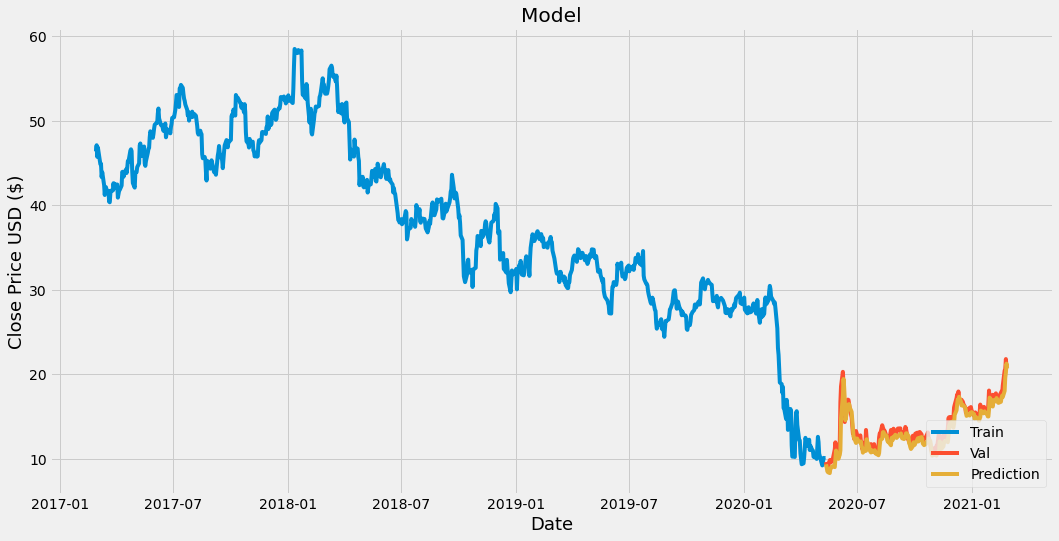

In [165]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc = 'lower right')
plt.show()

In [168]:
df = m.getStockQuote(web, df_nasdaq['symbol'][10], 'yahoo', from_data, to_data)
new_df = df.filter(['Close'])
scaler = MinMaxScaler(feature_range=(0,1))

In [169]:
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.fit_transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = models[symbol].predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[21.085342]], dtype=float32)

In [171]:
df = m.getStockQuote(web, df_nasdaq['symbol'][10], 'yahoo', to_data, today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-01,22.290001,21.049999,21.750000,21.180000,45229100,21.180000
2021-03-02,21.629999,21.120001,21.280001,21.440001,27395100,21.440001
2021-03-03,22.590000,21.730000,21.870001,22.170000,49114900,22.170000
2021-03-04,22.420000,20.410000,22.280001,21.240000,60619300,21.240000
2021-03-05,21.500000,18.940001,21.400000,20.450001,63066000,20.450001
2021-03-08,21.709999,20.650000,20.780001,21.469999,39620700,21.469999
2021-03-09,21.809999,20.660000,21.590000,21.600000,39678200,21.600000
2021-03-10,22.480000,21.370001,21.670000,21.750000,44114100,21.750000
2021-03-11,22.500000,21.770000,22.000000,22.150000,38834100,22.150000


In [139]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc = 'lower right')
plt.show()

array([[0.        ],
       [0.0781456 ],
       [0.24105959],
       [0.28211912],
       [0.38940383],
       [0.44503299],
       [0.38278141],
       [0.49271519],
       [0.3682118 ],
       [0.32185438],
       [0.36291391],
       [0.34304641],
       [0.33509921],
       [0.29668874],
       [0.24238412],
       [0.1602648 ],
       [0.21456954],
       [0.1841059 ],
       [0.23708599],
       [0.21059594],
       [0.24900654],
       [0.19867552],
       [0.11390725],
       [0.15364238],
       [0.16556293],
       [0.14701984],
       [0.11390725],
       [0.09668869],
       [0.14701984],
       [0.16688734],
       [0.28741726],
       [0.19735098],
       [0.22516556],
       [0.2516556 ],
       [0.20662247],
       [0.20529793],
       [0.15364238],
       [0.16688734],
       [0.30331116],
       [0.50728481],
       [0.38410595],
       [0.34039734],
       [0.30728476],
       [0.44105964],
       [0.41456947],
       [0.38675502],
       [0.46357621],
       [0.419

In [128]:
last_60_days_scaled = np.insert(last_60_days_scaled, 0, pred_price)


In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price HIstory')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Current Price USD ($)', fontsize= 18)


In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8) #80/20

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
#Creating training dataset
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
windowLenght = 60
for i in range(windowLenght, len(train_data)):
    x_train.append(train_data[i - windowLenght:i, 0])
    y_train.append(train_data[i, 0])
    if i <= windowLenght:
        print(x_train)
        print(y_train)
        

In [ ]:
# Convert x_train and y_train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
#Build the LSTM Model (50/50/25 are the number of neurons)

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 100)

In [ ]:
#Creating testing dataset
test_data = scaled_data[training_data_len - windowLenght: , :]
#Create dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(windowLenght, len(test_data)):
    x_test.append(test_data[i - windowLenght:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

In [ ]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()